<a href="https://colab.research.google.com/github/atefehhaji/HW/blob/master/Atefeh_ML_T4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **HW 4**


# ---


Created by **Atefeh Hajijamali Arani**,


In [3]:
from sklearn.cluster import KMeans
import numpy as np
from scipy import io
import matplotlib.pyplot as plt
import cv2
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC





In [4]:
from google.colab import files
uploaded = files.upload()
import io
df_train = pd.read_csv(io.BytesIO(uploaded['mnist_train.csv']))
# Dataset is now stored in a Pandas Dataframe

Saving mnist_train.csv to mnist_train (1).csv


**Split the Dataset into Train and Validation**


In [5]:
df_array_train = df_train.to_numpy()
X_train_original = df_array_train[:,1:]
#plt.imshow(X_train_original[4].reshape(28,28), cmap='gray')
Y_train_original = df_array_train[:,0]
#Y_train_original[4]

In [6]:
df_array_train_prm = df_array_train[np.random.RandomState(seed=42).permutation(df_array_train.shape[0])]
X_train = df_array_train_prm[:,1:]
Y_train = df_array_train_prm[:,0]
df_array_train_prm.shape
#plt.imshow(X_train[4].reshape(28,28), cmap='gray')
#print('X4 =',  X_train[4],)
#np.max(X_train)
#Y_train[4]

(60000, 785)

In [7]:
X_train = X_train/255

In [8]:
X_train_train = X_train[ :4800,:]
Y_train_train = Y_train[: 4800]

X_train_validation = X_train[4800:6000,: ]
Y_train_validation = Y_train[4800:6000]

In [9]:
kmeans = KMeans(n_clusters=10, random_state=181).fit(X_train_train)


In [12]:
from sklearn.metrics import silhouette_score

silhouette_score(X_train_train, kmeans.labels_)

0.056441374556224284

In [22]:
k_set = range(10, 20, 1)
kmeans_k = []
silhouette_score_set = []
for k in k_set:
    kmeans = KMeans(n_clusters=k, random_state=181).fit(X_train_train)
    kmeans_k.append(kmeans)


In [23]:
# print(kmeans)
# print( kmeans_k)
# silhouette_score(X_train_train, kmeans.labels_)
silhouette_scores = [silhouette_score(X_train_train, model.labels_) for model in kmeans_k]


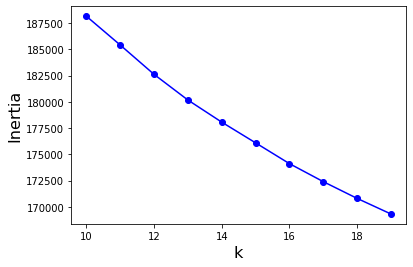

In [31]:
best_index = np.argmax(silhouette_scores)
best_k = k_set[best_index]
best_score = silhouette_scores[best_index]


inertias = [model.inertia_ for model in kmeans_k]
best_inertia = inertias[best_index]


plt.plot(k_set, inertias, "bo-")
plt.xlabel("k", fontsize=16)
plt.ylabel("Inertia", fontsize=16)
plt.plot(best_k, best_inertia)

